In [1]:
import numpy as np

In [2]:
import dataset as ds

In [3]:
x_train, y_train = ds.load_data_mat(filename="data/train_32x32.mat", max_samples=70000)

In [4]:
vektors_train = ds.extension_to_vector(x_train)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
classifier = KNeighborsClassifier(n_neighbors=21)

In [7]:
classifier.fit(vektors_train, y_train)

KNeighborsClassifier(n_neighbors=21)

## тестирование обученной модели

In [8]:
x_test, y_test = ds.load_data_mat(filename="data/test_32x32.mat", max_samples=5000, seed=778)
vektors_test = ds.extension_to_vector(x_test)

In [9]:
y_pred = classifier.predict(vektors_test)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [11]:
art_matrix = confusion_matrix(y_pred,y_test, normalize='true')

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

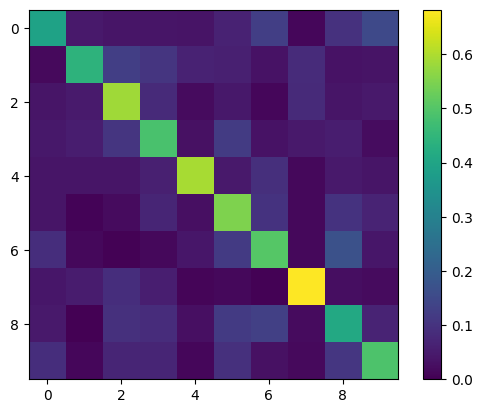

In [13]:
fig, ax = plt.subplots()
matrix = ax.imshow(art_matrix)
plt.colorbar(matrix)
plt.show()

In [14]:
accuracy_score(y_pred,y_test)

0.4964

## Минутка валидации

In [15]:
x_train, y_train = ds.load_data_mat(filename="data/train_32x32.mat", max_samples=10000)
vektors_train = ds.extension_to_vector(x_train)

x_test, y_test = ds.load_data_mat(filename="data/test_32x32.mat", max_samples=1000)
vektors_test = ds.extension_to_vector(x_test)

In [16]:
accuracy_array = np.zeros(40,dtype=np.float32)
for i in range(40):
    classifier = KNeighborsClassifier(n_neighbors=i+1)
    classifier.fit(vektors_train, y_train)
    y_pred = classifier.predict(vektors_test)
    accuracy_array[i] = accuracy_score(y_pred,y_test)

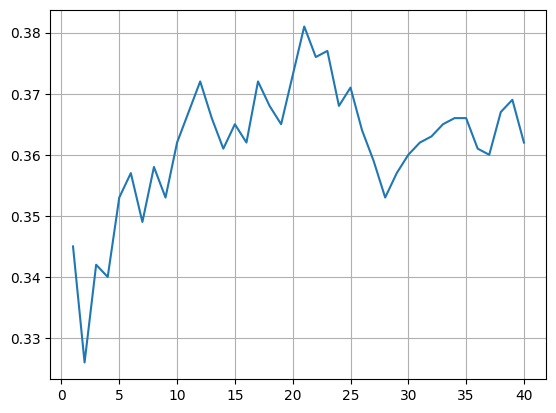

In [17]:
plt.plot(list(range(1,41)),accuracy_array)
plt.grid()

In [18]:
accuracy_array[20]

0.381